# Financial Inclusion

Financial inclusion means that individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.


a) Specifying the Data Analytic Question

which individuals are most likely to have or use a bank account.

b) Metric for Success

Project will be successful when we are able to accurately answer the business problem from clean data

c) Understanding the context

Data to be analysed is demographic, showing financial services used by individuals across East Africa, from 2016 to 2018.

d) Recording the Experimental Design

e) Data Relevance

### Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt

### Loading the dataset

In [6]:
finance = pd.read_csv("http://bit.ly/FinancialDataset")

### Preview the dataset

In [7]:
# the head of the dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
# tail of the dataset
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:
finance['year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
23519    2018
23520    2018
23521    2018
23522    2018
23523    2018
Name: year, Length: 23524, dtype: int64

### Explore the dataset

In [10]:
# the size of the dataset
finance.shape

(23524, 13)

the dataset has 23524 rows and 13 columns

In [11]:
# datatypes of each column
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

### Fixing the datatypes

In [12]:

# convert the date time into string 
finance['year'] = finance['year'].astype('str')
finance['year'] =  pd.to_datetime(finance['year'],format='%Y-%m-%d')

In [13]:
finance.dtypes

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

In [14]:
# describe the data
finance.describe()

,household_size,Respondent Age
count,23496.000000,23490.000000
mean,3.681818,38.804300
std,2.279933,16.519996
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [15]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 23510 non-null  object        
 1   year                    23524 non-null  datetime64[ns]
 2   uniqueid                23524 non-null  object        
 3   Has a Bank account      23488 non-null  object        
 4   Type of Location        23509 non-null  object        
 5   Cell Phone Access       23513 non-null  object        
 6   household_size          23496 non-null  float64       
 7   Respondent Age          23490 non-null  float64       
 8   gender_of_respondent    23490 non-null  object        
 9   The relathip with head  23520 non-null  object        
 10  marital_status          23492 non-null  object        
 11  Level of Educuation     23495 non-null  object        
 12  Type of Job             23494 non-null  object

### Completeness

#### check for missing values

In [16]:
# missing values
finance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

all columns except year and uniqueid have missing values

#### handle the missing values(impute)

In [17]:
# impute the missing values
finance['country'].fillna(finance['country'].mode()[0], inplace=True)
finance['Has a Bank account'].fillna(finance['Has a Bank account'].mode()[0], inplace=True)
finance['Type of Location'].fillna(finance['Type of Location'].mode()[0], inplace=True)
finance['Cell Phone Access'].fillna(finance['Cell Phone Access'].mode()[0], inplace=True)
finance['household_size'].fillna(finance['household_size'].mean(), inplace=True)
finance['Respondent Age'].fillna(finance['Respondent Age'].mean(), inplace=True)
finance['gender_of_respondent'].fillna(finance['gender_of_respondent'].mode()[0], inplace=True)
finance['The relathip with head'].fillna(finance['The relathip with head'].mode()[0], inplace=True)
finance['marital_status'].fillna(finance['marital_status'].mode()[0], inplace=True)
finance['Level of Educuation'].fillna(finance['Level of Educuation'].mode()[0], inplace=True)
finance['Type of Job'].fillna(finance['Type of Job'].mode()[0], inplace=True)

In [18]:
finance.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [19]:
finance.sample(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
18183,Tanzania,2017-01-01,uniqueid_3381,No,Urban,Yes,2.0,28.0,Male,Head of Household,Single/Never Married,Tertiary education,Self employed
19512,Tanzania,2017-01-01,uniqueid_4710,Yes,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Tertiary education,Self employed
4006,Kenya,2018-01-01,uniqueid_4007,Yes,Rural,Yes,3.0,52.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
20349,Tanzania,2017-01-01,uniqueid_5547,No,Urban,Yes,3.0,63.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
16784,Tanzania,2017-01-01,uniqueid_1982,Yes,Rural,Yes,1.0,42.0,Male,Head of Household,Single/Never Married,Primary education,Formally employed Private
8089,Rwanda,2016-01-01,uniqueid_2022,No,Rural,No,1.0,97.0,Female,Head of Household,Widowed,No formal education,Other Income
21993,Uganda,2018-01-01,uniqueid_571,No,Rural,Yes,6.0,30.0,Female,Spouse,Married/Living together,No formal education,Self employed
10125,Rwanda,2016-01-01,uniqueid_4058,No,Rural,Yes,3.0,28.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
2287,Kenya,2018-01-01,uniqueid_2288,No,Rural,No,6.0,50.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
509,Kenya,2018-01-01,uniqueid_510,Yes,Urban,Yes,2.0,21.0,Female,Child,Single/Never Married,Tertiary education,Remittance Dependent


### Consistency

In [20]:
# check for duplicate values
finance.duplicated().sum()

0

there are no duplicate values

### Outlier detection and removal

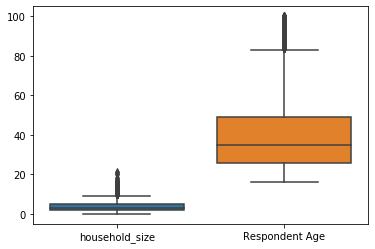

In [21]:
# check for outliers
col_names = finance[['household_size', 'Respondent Age']]

sns.boxplot(data = col_names)

presence of outliers

In [22]:
# removing the outliers using IQR
# household

Q1 = finance['household_size'].quantile(0.25)
Q3 = finance['household_size'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
finance['household_size']= np.where(finance['household_size'] >upper,upper,\
    np.where(finance['household_size'] <lower,lower,finance['household_size']))

In [23]:
# removing the outliers using IQR
# respondent age

Q1 = finance['Respondent Age'].quantile(0.25)
Q3 = finance['Respondent Age'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
finance['Respondent Age']= np.where(finance['Respondent Age'] >upper,upper,\
    np.where(finance['Respondent Age'] <lower,lower,finance['Respondent Age']))

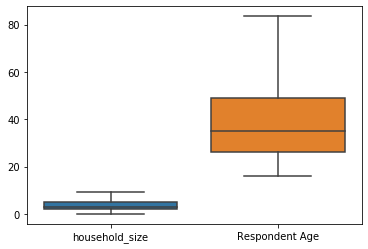

In [24]:

col_names = finance[['household_size', 'Respondent Age']]

sns.boxplot(data = col_names)

no outliers

### Univariate exploratory analysis

Text(0, 0.5, 'Bank Accounts')

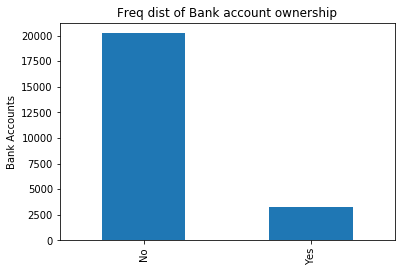

In [25]:
#visualisation of bank account ownership count.
finance['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Bank account ownership', )
plt.ylabel('Bank Accounts')
#From the numbers it is clear we are yet to achieve financial inclusion.

more people do not have bank accounts

Text(0, 0.5, 'Cell Phone Access')

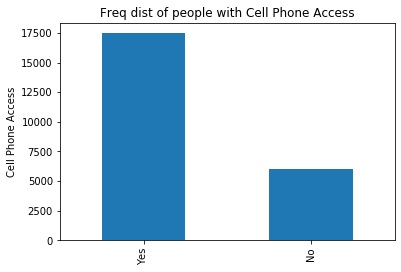

In [26]:
finance['Cell Phone Access'].value_counts().plot.bar(title='Freq dist of people with Cell Phone Access', )
plt.ylabel('Cell Phone Access')

many people do have acces to cell phones

this is one step closer to achieving the financial inclusion in East Africa

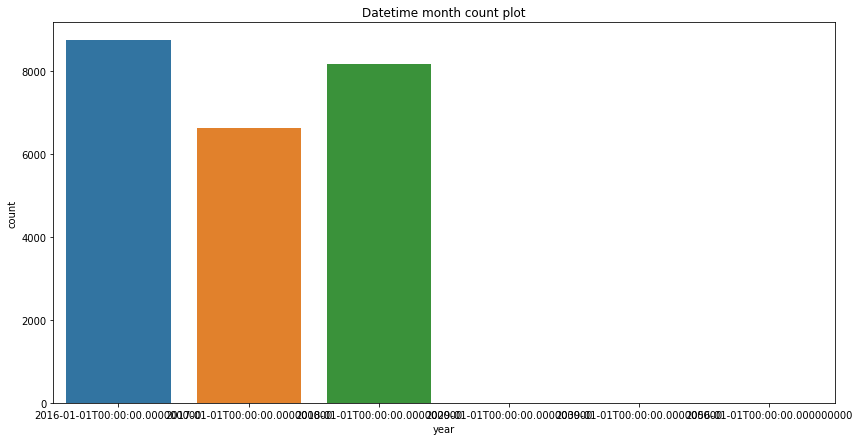

In [27]:
plt.figure(figsize = (14, 7))
sns.countplot(x = 'year', data = finance)
plt.title('Datetime month count plot')
plt.show()

Text(0, 0.5, 'Bank Accounts')

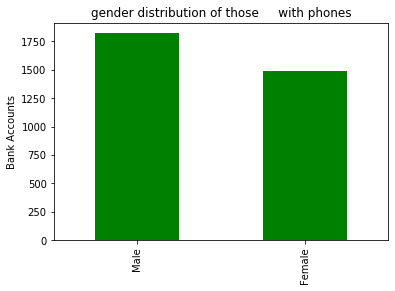

In [28]:
#a visualisation to see gender distibution of those with phones.
#a new dataframe is created where df2['Has a Bank account'] == 'Yes'
a=finance[finance['Has a Bank account'] == 'Yes']
a['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those \
    with phones', color='green')
plt.ylabel('Bank Accounts')
# out of those with phones males are more than females.

there are more male than female

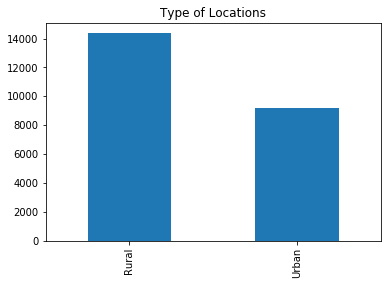

In [29]:
finance['Type of Location'].value_counts().plot.bar(title='Type of Locations')

more people live in rural areas

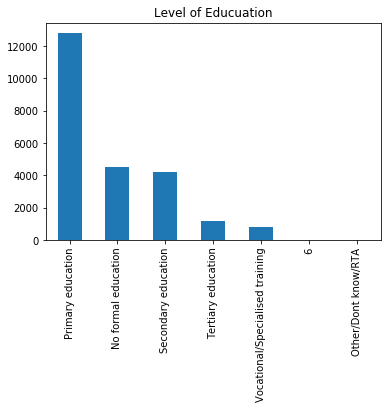

In [30]:
finance['Level of Educuation'].value_counts().plot.bar(title='Level of Educuation')

many people have primary education

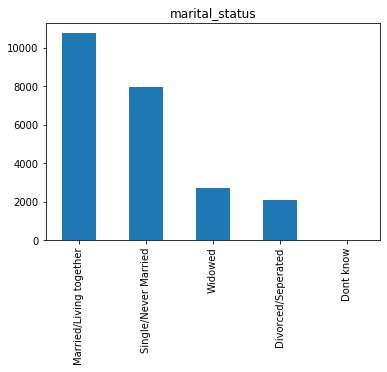

In [31]:
finance['marital_status'].value_counts().plot.bar(title='marital_status')

many people interviewed are married and living together

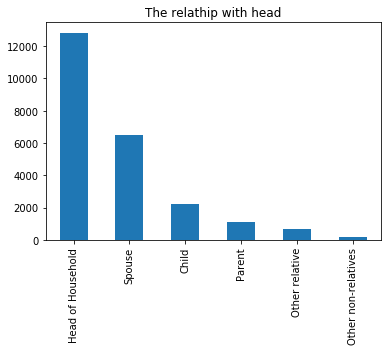

In [32]:
finance['The relathip with head'].value_counts().plot.bar(title='The relathip with head')


most of the responses in our dataset are from people who are the heads of the household

### Bivarriate Exploratory Analysis

Text(0, 0.5, 'Bank Accounts')

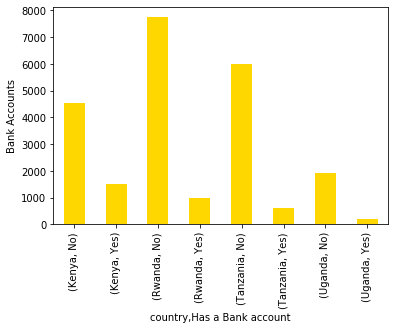

In [33]:
#A visualisation to check Bank account ownership in the country.
country=finance.groupby (['country','Has a Bank account'])['Has a Bank account'].count()
country.plot(kind='bar', color='gold')
plt.ylabel('Bank Accounts')

Rwanda is the leading in the number of people without bank accounts

Uganda has the least number of people with bank accounts

Text(0, 0.5, 'Bank Accounts')

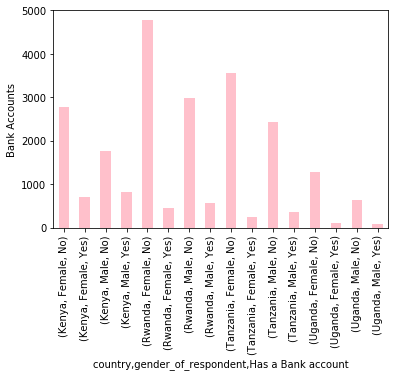

In [34]:
#A visualisation to check Bank account onwnership in the countries given gender.
gender=finance.groupby (['country','gender_of_respondent','Has a Bank account'])['Has a Bank account'].count()
gender.plot(kind='bar', color='pink')
plt.ylabel('Bank Accounts')

In all countries more males have a bank account except in Uganda, where more feemales have
bank accounts compared to males

#### Correlation

In [35]:
#checking for correlation of the numerical variables
finance.corr()


,household_size,Respondent Age
household_size,1.000000,-0.120973
Respondent Age,-0.120973,1.000000


there is very weak negative correlation between the variables

Text(0, 0.5, 'Bank Accounts')

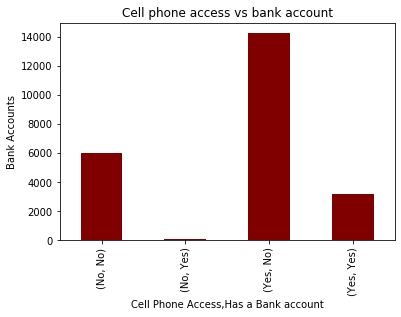

In [36]:
#visualisation on phone access and owning a bank account.
phone=finance.groupby (['Cell Phone Access','Has a Bank account'])['Has a Bank account'].count()
phone.plot(kind='bar', color='maroon')
plt.title('Cell phone access vs bank account')
plt.ylabel('Bank Accounts')

out of those with no cell phone access, very few have access to a bank account.

out of those with cell phone access, very many have no bank accounts.

this could be due to mobile banking services offerred,therefore finding no
need to have a bank account.

Text(0, 0.5, 'Bank Accounts')

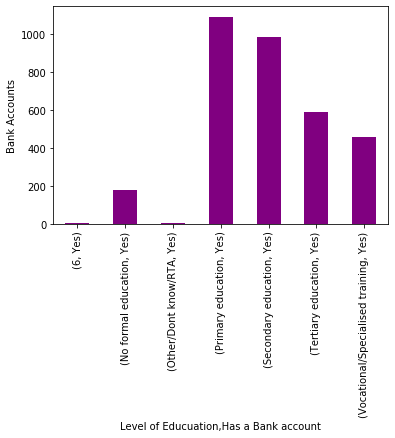

In [37]:
#level of educcation vs bank account ownership.
c=a.groupby (['Level of Educuation','Has a Bank account'])['Has a Bank account'].count()
c.plot(kind='bar',  color='purple')
plt.ylabel('Bank Accounts')

Out of those with bank accounts, those who got to primary school are the 
highest number followed by secondary education

this shows that education has an impact on

Text(0.5, 1.0, 'Marital status vs bank account access')

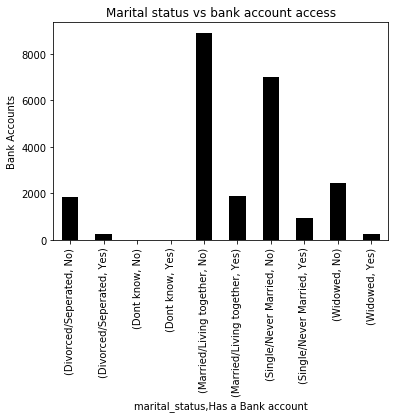

In [38]:
#marital status vs bank account ownership
marital=finance.groupby (['marital_status','Has a Bank account'])['Has a Bank account'].count()
marital.plot(kind='bar',  color='black')
plt.ylabel('Bank Accounts')
plt.title('Marital status vs bank account access')


those married/living together have highest number of bank accounts

Text(0.5, 1.0, 'Type of location vs bank account')

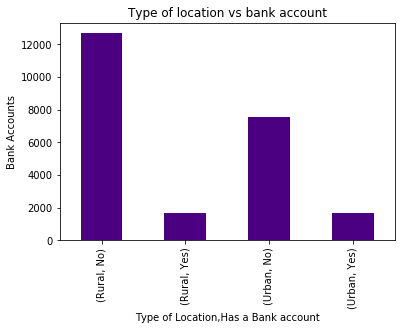

In [39]:
#rural/urban vs bank accounts.
area=finance.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
area.plot(kind='bar',  color='indigo')
plt.ylabel('Bank Accounts')
plt.title('Type of location vs bank account')


many people in rural do not have bank access

awareness need be created in the rural areas on ownership of bank accounts

Text(0, 0.5, 'Bank Accounts')

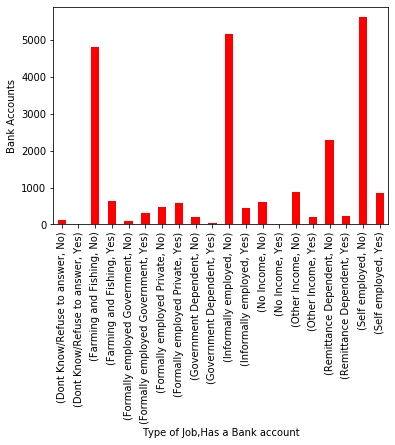

In [40]:
#type of job vs bank account ownership
job=finance.groupby (['Type of Job','Has a Bank account'])['Has a Bank account'].count()
job.plot(kind='bar',  color='red')
plt.ylabel('Bank Accounts')
#those self employed are more likely to have a bank account

In [41]:
finance.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [42]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
X = finance.iloc[:, 6:-5].values
y=finance['gender_of_respondent']

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test


(array([[ 4.       , 24.       ],
        [ 3.       , 30.       ],
        [ 1.       , 38.8042997],
        ...,
        [ 4.       , 32.       ],
        [ 6.       , 28.       ],
        [ 4.       , 31.       ]]),
 array([[ 9., 20.],
        [ 5., 30.],
        [ 6., 41.],
        ...,
        [ 6., 41.],
        [ 6., 26.],
        [ 5., 44.]]),
 22960      Male
 4523       Male
 437      Female
 1657       Male
 5110     Female
           ...  
 13123      Male
 19648    Female
 9845       Male
 10799    Female
 2732       Male
 Name: gender_of_respondent, Length: 18819, dtype: object,
 4857     Female
 22131      Male
 22675    Female
 5165     Female
 16209      Male
           ...  
 2055     Female
 16486      Male
 13577    Female
 3014     Female
 11020      Male
 Name: gender_of_respondent, Length: 4705, dtype: object)

In [44]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [46]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56079045, 0.43920955])

In [47]:

#Using 2 Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [48]:
#Training and Making Predictions
#we use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [49]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2708   38]
 [1903   56]]
Accuracy0.5874601487778959


In [50]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
A = finance.iloc[:, 6:-5].values
#b = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
b=finance['gender_of_respondent']

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test


(array([[ 4.       , 24.       ],
        [ 3.       , 30.       ],
        [ 1.       , 38.8042997],
        ...,
        [ 4.       , 32.       ],
        [ 6.       , 28.       ],
        [ 4.       , 31.       ]]),
 array([[ 9., 20.],
        [ 5., 30.],
        [ 6., 41.],
        ...,
        [ 6., 41.],
        [ 6., 26.],
        [ 5., 44.]]),
 22960      Male
 4523       Male
 437      Female
 1657       Male
 5110     Female
           ...  
 13123      Male
 19648    Female
 9845       Male
 10799    Female
 2732       Male
 Name: gender_of_respondent, Length: 18819, dtype: object,
 4857     Female
 22131      Male
 22675    Female
 5165     Female
 16209      Male
           ...  
 2055     Female
 16486      Male
 13577    Female
 3014     Female
 11020      Male
 Name: gender_of_respondent, Length: 4705, dtype: object)

In [52]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)


In [53]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [54]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [55]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

[[2717   29]
 [1916   43]]
Accuracy0.5866099893730075
